### Testing environment

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/burkeobrien/opt/anaconda3/envs/ds_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


### Importing dataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sb

In [3]:
df = pd.read_csv("../data/audi.csv")

### EDA

In [4]:
print(df.shape)
df.info(verbose=True)

(10668, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


**Check for missing values**

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**Describe Target Feature**
We will be predicting list price, but there are lots of other interesting approaches to this dataset. Price is a continuous feature, which makes this a regression problem.

In [6]:
df['price'].describe()

count     10668.000000
mean      22896.685039
std       11714.841888
min        1490.000000
25%       15130.750000
50%       20200.000000
75%       27990.000000
max      145000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

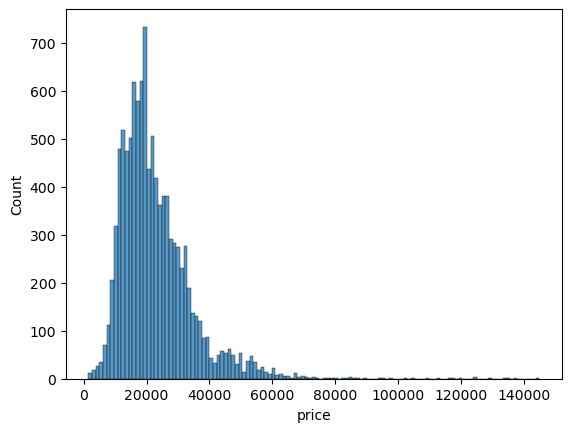

In [7]:
sb.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

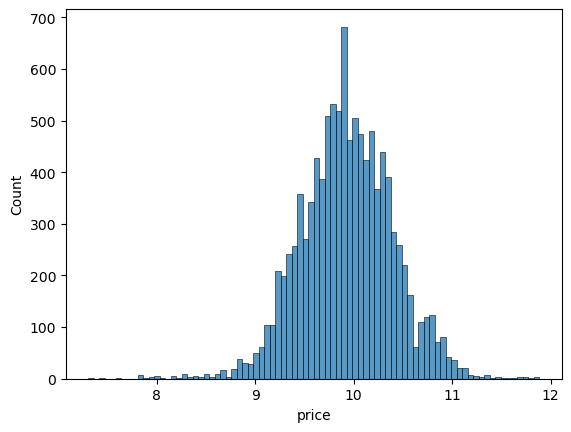

In [8]:
sb.histplot(np.log(df['price']))

**Categorical Feature Descriptions**
There are three categorical features: model, transmission, and fuelType

In [29]:
len(df['model'].value_counts())

26

In [28]:
df['model'].value_counts() / len(df)

 A3     0.180821
 Q3     0.132827
 A4     0.129453
 A1     0.126265
 A5     0.082677
 Q5     0.082208
 Q2     0.077053
 A6     0.070116
 Q7     0.037214
 TT     0.031496
 A7     0.011436
 A8     0.011061
 Q8     0.006468
 RS6    0.003656
 RS3    0.003093
 RS4    0.002906
 RS5    0.002718
 R8     0.002625
 S3     0.001687
 SQ5    0.001500
 S4     0.001125
 SQ7    0.000750
 S8     0.000375
 S5     0.000281
 A2     0.000094
 RS7    0.000094
Name: model, dtype: float64

<AxesSubplot:>

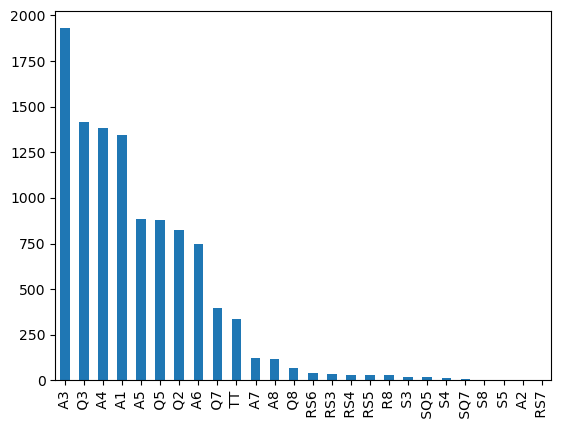

In [9]:
df['model'].value_counts().plot(kind='bar') 

In [10]:
df['transmission'].value_counts() / len(df)

Manual       0.409543
Semi-Auto    0.336614
Automatic    0.253843
Name: transmission, dtype: float64

In [11]:
df['fuelType'].value_counts() / len(df)

Diesel    0.522778
Petrol    0.474597
Hybrid    0.002625
Name: fuelType, dtype: float64

**Continuous Features**<br>
There are 5 continuous features: year, mileage, tax, mpg, and engineSize

In [12]:
df['year'].describe()

count    10668.000000
mean      2017.100675
std          2.167494
min       1997.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Count'>

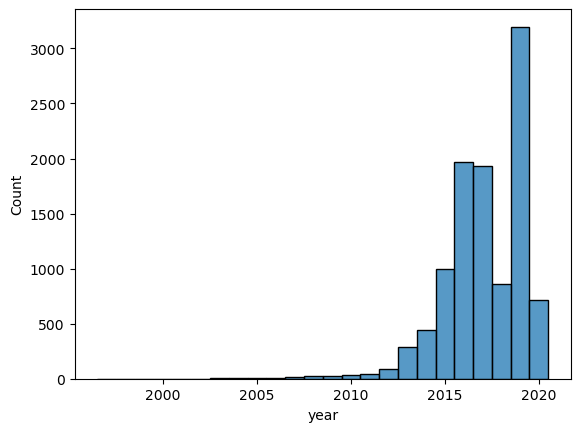

In [13]:
sb.histplot(df['year'], discrete = True)

In [14]:
df['mileage'].describe()

count     10668.000000
mean      24827.244001
std       23505.257205
min           1.000000
25%        5968.750000
50%       19000.000000
75%       36464.500000
max      323000.000000
Name: mileage, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='Count'>

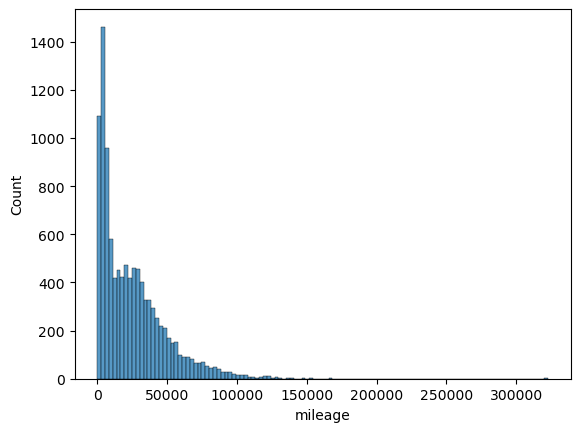

In [15]:
sb.histplot(df['mileage'])

<AxesSubplot:xlabel='mileage', ylabel='Count'>

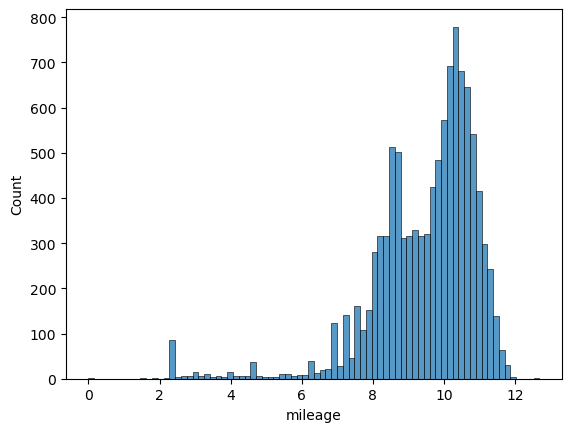

In [16]:
sb.histplot(np.log(df['mileage']))

In [17]:
df['tax'].describe()

count    10668.000000
mean       126.011436
std         67.170294
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

<AxesSubplot:xlabel='tax', ylabel='Count'>

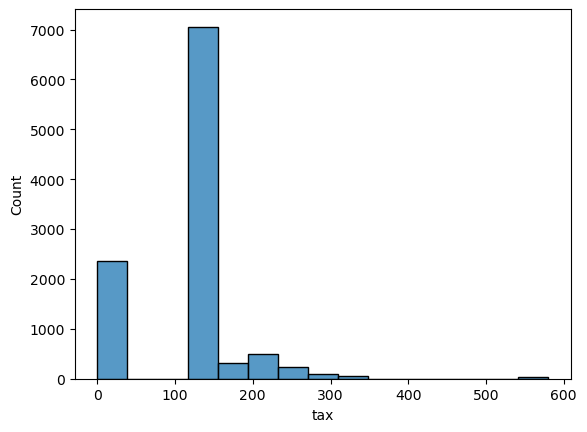

In [18]:
sb.histplot(df['tax'], bins = 15)

In [19]:
df['engineSize'].describe()

count    10668.000000
mean         1.930709
std          0.602957
min          0.000000
25%          1.500000
50%          2.000000
75%          2.000000
max          6.300000
Name: engineSize, dtype: float64

<AxesSubplot:xlabel='engineSize', ylabel='Count'>

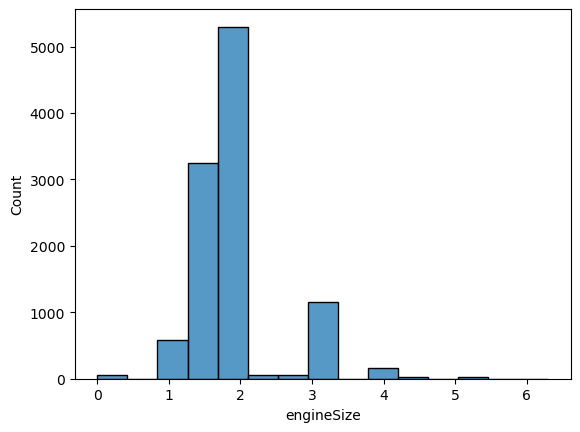

In [20]:
sb.histplot(df['engineSize'], bins = 15)

**Relations between features**

[[<AxesSubplot:xlabel='year', ylabel='year'>
  <AxesSubplot:xlabel='price', ylabel='year'>
  <AxesSubplot:xlabel='mileage', ylabel='year'>
  <AxesSubplot:xlabel='tax', ylabel='year'>
  <AxesSubplot:xlabel='mpg', ylabel='year'>
  <AxesSubplot:xlabel='engineSize', ylabel='year'>]
 [<AxesSubplot:xlabel='year', ylabel='price'>
  <AxesSubplot:xlabel='price', ylabel='price'>
  <AxesSubplot:xlabel='mileage', ylabel='price'>
  <AxesSubplot:xlabel='tax', ylabel='price'>
  <AxesSubplot:xlabel='mpg', ylabel='price'>
  <AxesSubplot:xlabel='engineSize', ylabel='price'>]
 [<AxesSubplot:xlabel='year', ylabel='mileage'>
  <AxesSubplot:xlabel='price', ylabel='mileage'>
  <AxesSubplot:xlabel='mileage', ylabel='mileage'>
  <AxesSubplot:xlabel='tax', ylabel='mileage'>
  <AxesSubplot:xlabel='mpg', ylabel='mileage'>
  <AxesSubplot:xlabel='engineSize', ylabel='mileage'>]
 [<AxesSubplot:xlabel='year', ylabel='tax'>
  <AxesSubplot:xlabel='price', ylabel='tax'>
  <AxesSubplot:xlabel='mileage', ylabel='tax'>
  <

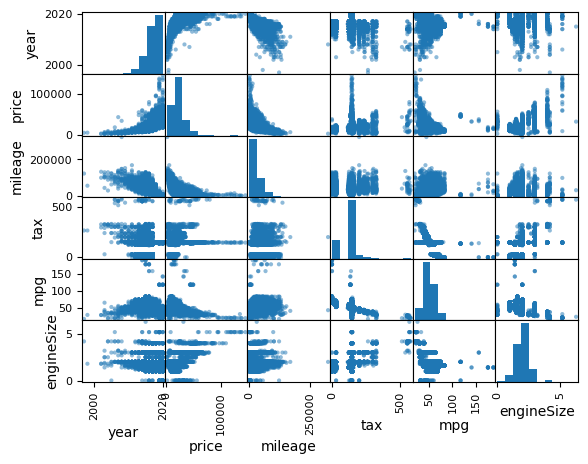

In [21]:
#df2 = df
#df2['price'] = np.log(df2['price'] )

print(pd.plotting.scatter_matrix(df))

<AxesSubplot:xlabel='mileage', ylabel='price'>

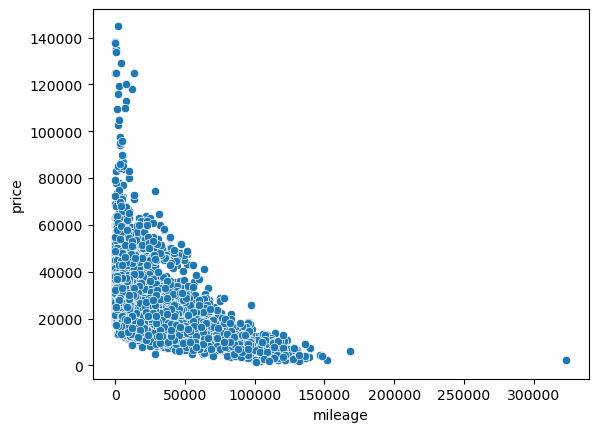

In [8]:
sb.scatterplot(df, x='mileage', y = 'price')

<AxesSubplot:xlabel='transmission', ylabel='price'>

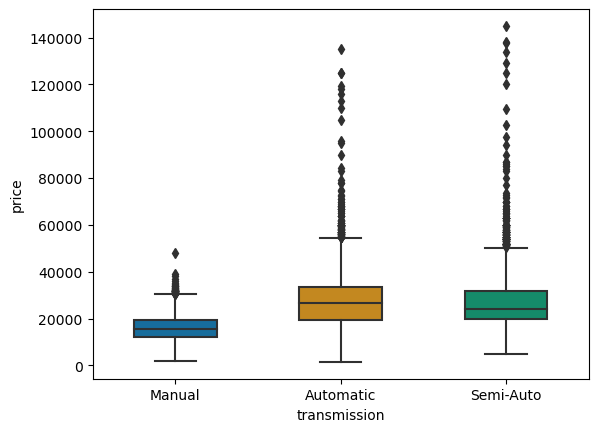

In [7]:
sb.boxplot(df[['price','transmission']], x = 'transmission', y = 'price', palette = 'colorblind', width = .5)

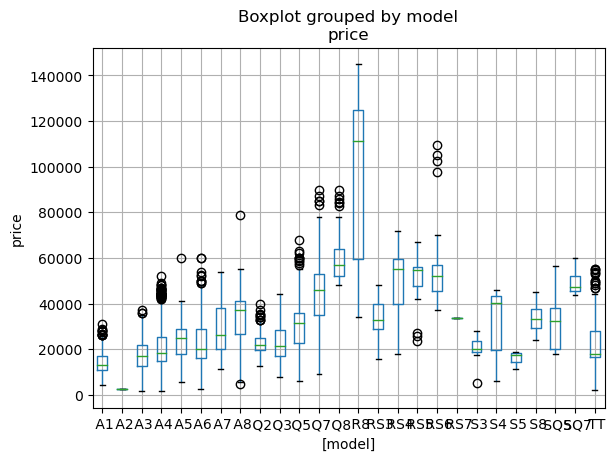

In [23]:
df[['price','model']].boxplot(by='model')
plt.ylabel('price')
plt.show()

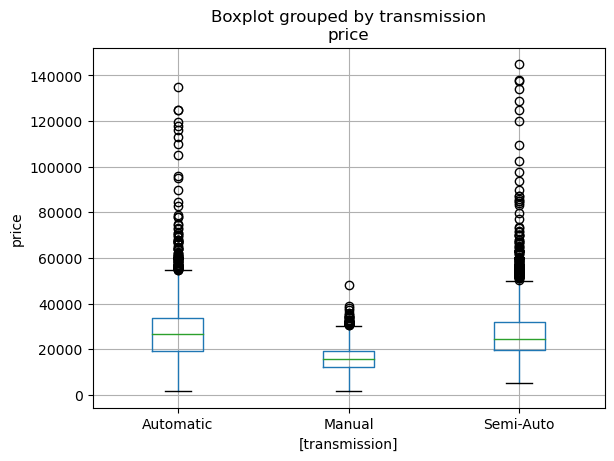

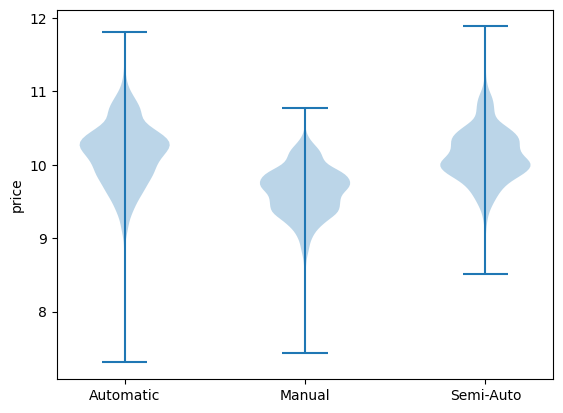

In [26]:
df[['price','transmission']].boxplot(by='transmission')
plt.ylabel('price')
plt.show()

dataset = [np.log(df[df['transmission']=='Automatic']['price'].values),
           np.log(df[df['transmission']=='Manual']['price'].values),
           np.log(df[df['transmission']=='Semi-Auto']['price'].values)]

plt.violinplot(dataset = dataset)
plt.xticks([1,2, 3],['Automatic','Manual','Semi-Auto'])
plt.ylabel('price')
plt.show()

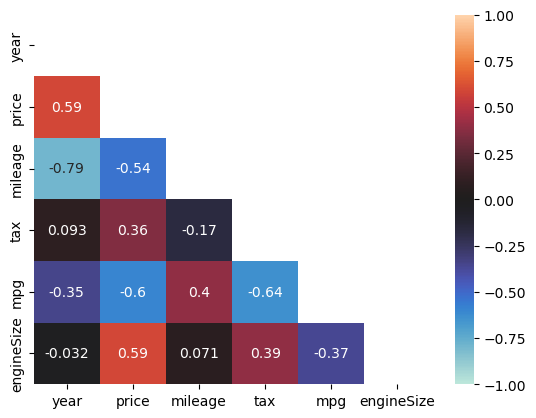

In [30]:
corr_m = df.corr()
mask = np.triu(corr_m)

ax = sb.heatmap(corr_m, annot=True, center = 0,mask = mask, vmin = -1, vmax = 1)